# EDA

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Enter Computer\Downloads\diamonds 2.csv")

print(df.head())


   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [2]:
print(df.shape)  



(53947, 11)


In [3]:
df = df.drop(columns=['Unnamed: 0'])


In [4]:
print(df.describe())  


              carat         depth         table         price             x  \
count  53947.000000  53946.000000  53947.000000  53947.000000  53947.000000   
mean       0.797936     61.749271     57.457143   3932.614158      5.731181   
std        0.473981      1.432571      2.234418   3989.233934      1.121691   
min        0.200000     43.000000     43.000000   -200.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y  
count  53947.000000  
mean       5.734549  
std        1.142063  
min        0.000000  
25%        4.720000  
50%        5.710000  
75%        6.540000  
max       58.900000  


In [5]:
(df['price'] <= 0).sum()


np.int64(1)

In [6]:
df = df[df['price'] > 0]


In [7]:
(df['price'] <= 0).sum()

np.int64(0)

In [8]:
print(df.dtypes)


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z           object
dtype: object


In [9]:
df['z'] = pd.to_numeric(df['z'], errors='coerce')

In [10]:
df['z'].isnull().sum()

np.int64(1)

In [11]:
print(df.isnull().sum())


carat      0
cut        3
color      1
clarity    0
depth      1
table      0
price      0
x          0
y          0
z          1
dtype: int64


In [12]:
df = df.dropna()


In [13]:
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [14]:
df.duplicated().sum()


np.int64(153)

In [15]:
df.drop_duplicates(inplace=True)


In [16]:
df.duplicated().sum()

np.int64(0)

# Visualizations ( 1D )

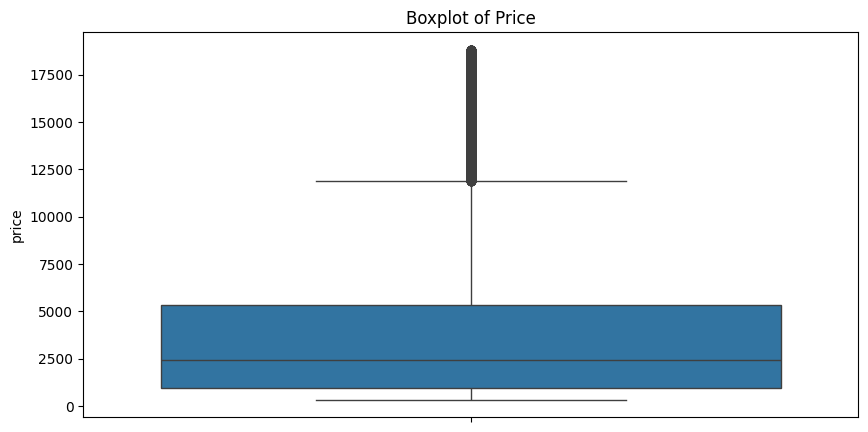

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df['price'])
plt.title("Boxplot of Price")
plt.show()


#### There is outlier but we will investigate about it beacause it is large portion 

In [18]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print( outliers.shape[0])


3523


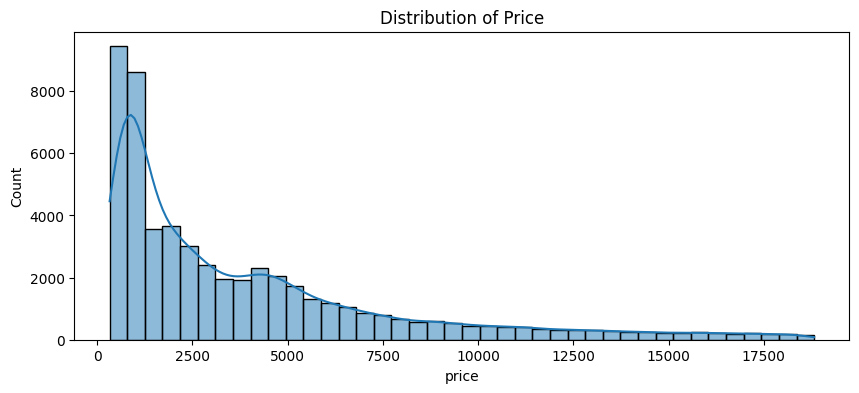

In [19]:
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=40, kde=True)
plt.title("Distribution of Price")
plt.show()

#### After see the histogram we conclude  we will not remove them because it is real important values to observe
#### Right Skewed Distribution [ most of the dimonds' price under 8000]

In [20]:
print(df['cut'].unique())



['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'very good' 'ideal' 'premium']


In [21]:
df['cut'] = df['cut'].str.capitalize()

In [22]:
print(df['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very good' 'Fair']


C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_13140\445169273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cut', palette='Set2')


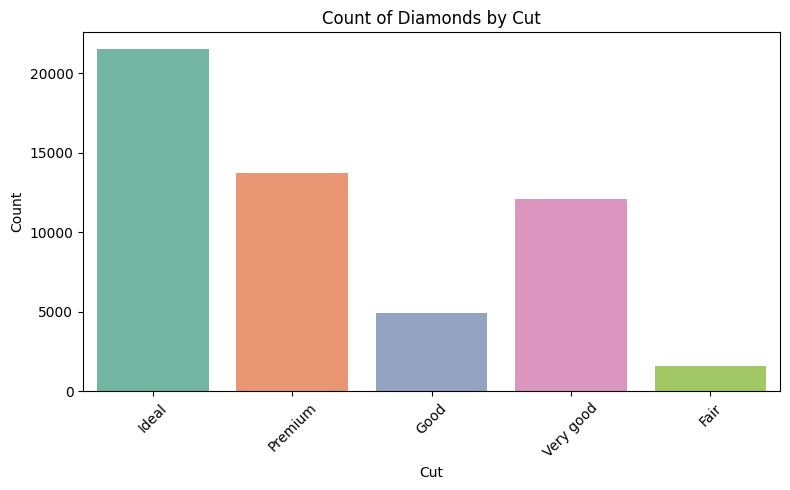

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='cut', palette='Set2')
plt.title('Count of Diamonds by Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Most common value is Ideal then Premuim

In [24]:
print(df['color'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D' '87']


In [25]:
print(df['color'].value_counts())


color
G     11262
E      9774
F      9516
H      8272
D      6754
I      5407
J      2801
87        1
Name: count, dtype: int64


In [26]:
df[df['color'] == '87']

,carat,cut,color,clarity,depth,table,price,x,y,z
619,0.71,Premium,87,VS1,62.7,59.0,2839,5.7,5.62,3.55


In [27]:
df = df.drop(index=619)


In [28]:
print(df['color'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']


C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_13140\1898488738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='color', palette='Set1')


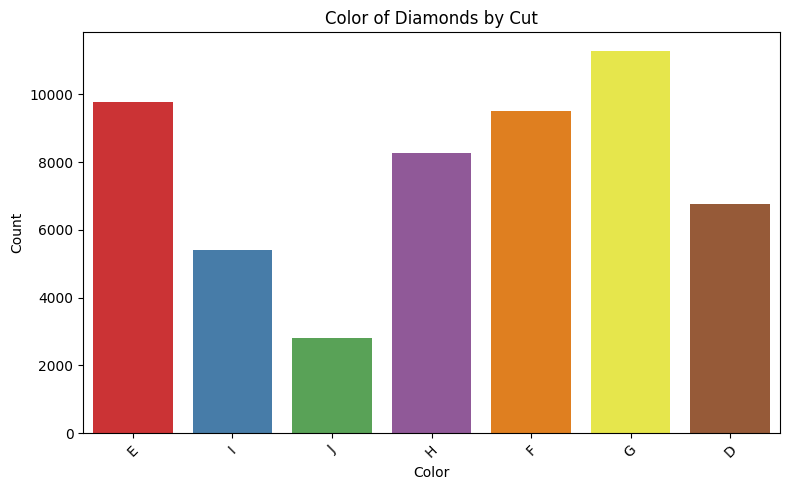

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='color', palette='Set1')
plt.title('Color of Diamonds by Cut')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Most color id=s G then (E&F)

# Visualizations ( 2D )

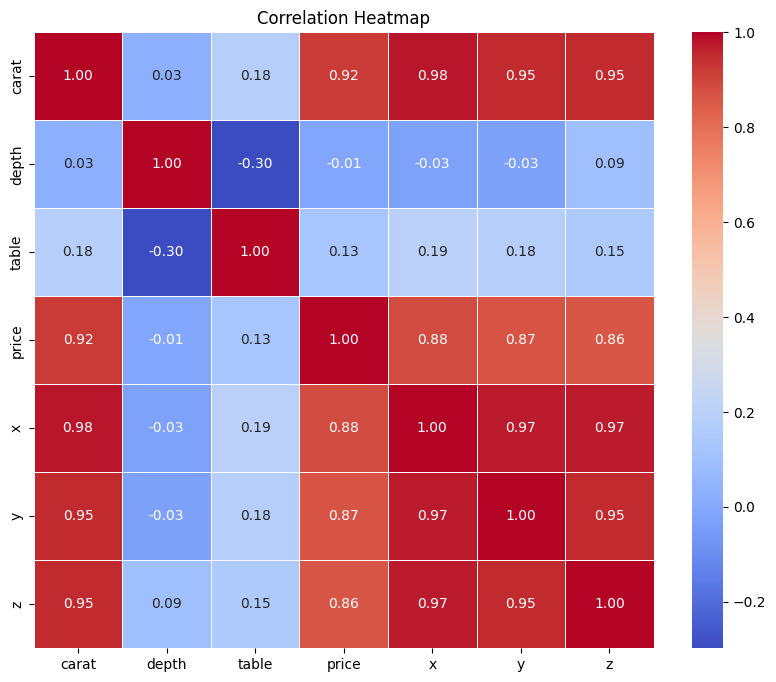

In [30]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#### High Correlation Cluster (0.88-0.99 correlations)
#### Carat, price, x, y, z dimensions all move together
#### Depth: Shows weak/negative correlations, especially with table (-0.30)
#### Table: Weakly correlated with z/price variables (0.13-0.15)

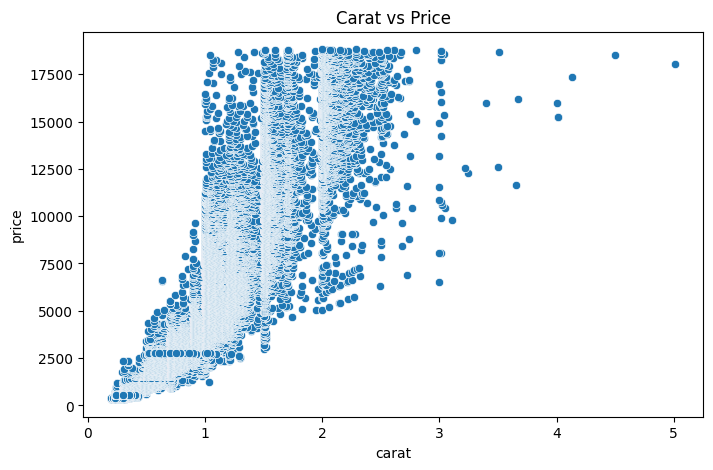

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='carat', y='price', data=df)
plt.title("Carat vs Price")
plt.show()


#### Linear correlation between price and carat

# Visualizations ( 3D )

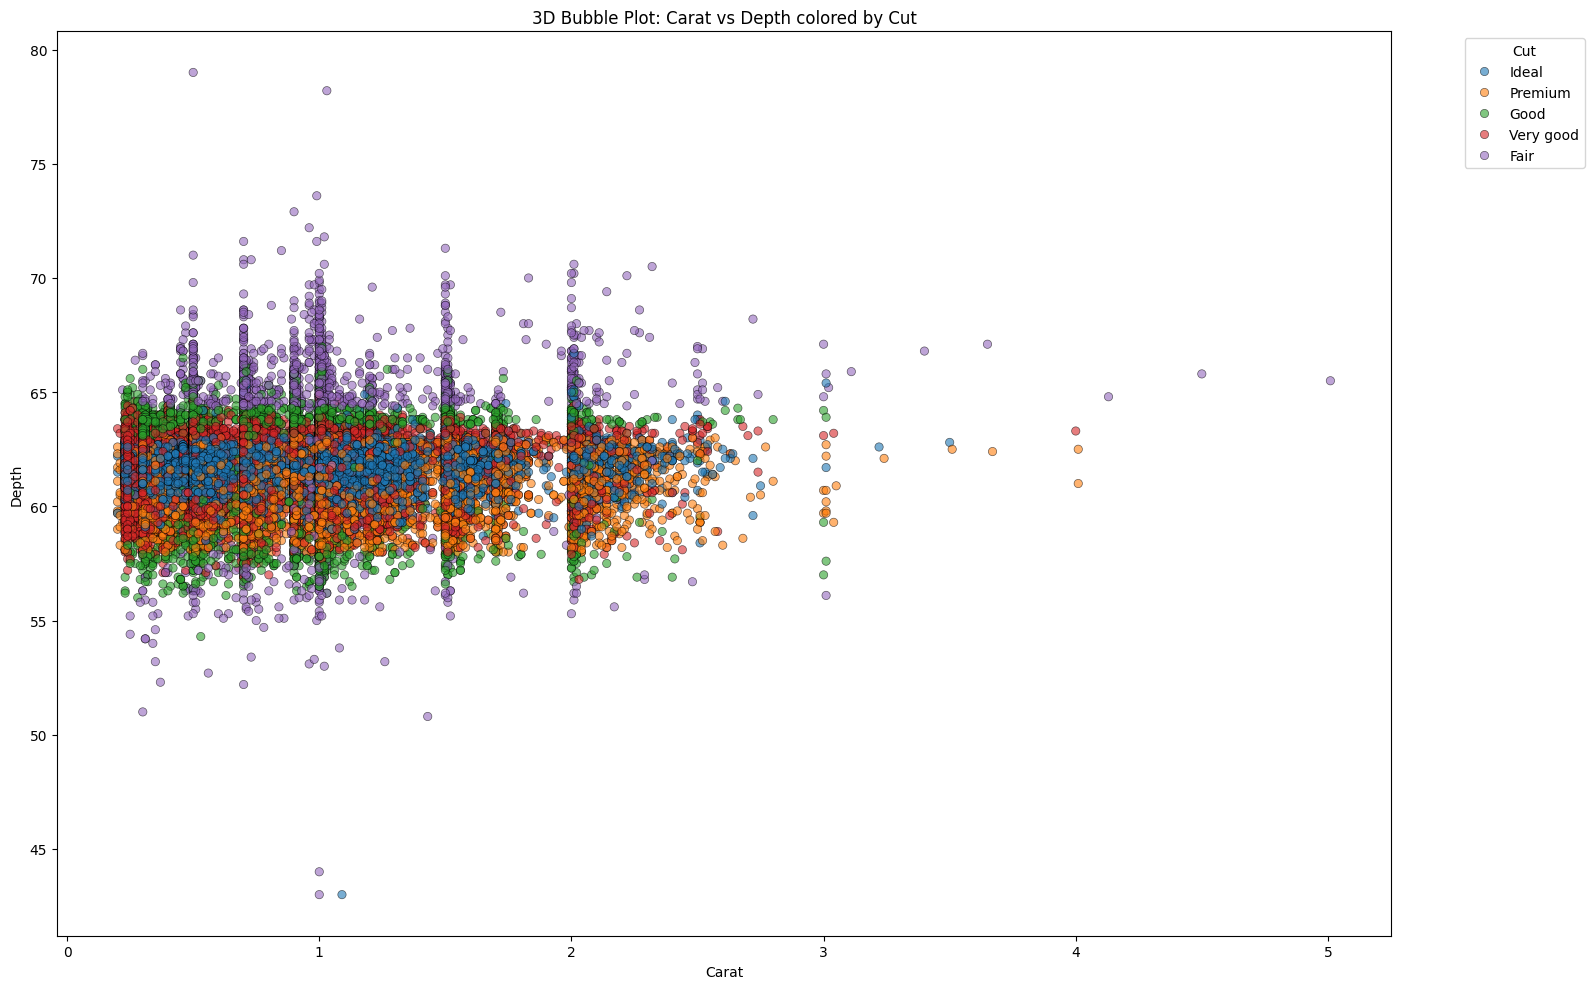

In [32]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=df,
    x='carat',
    y='depth',
    hue='cut',
    alpha=0.6,
    edgecolor='black'
)

plt.title("3D Bubble Plot: Carat vs Depth colored by Cut")
plt.xlabel("Carat")
plt.ylabel("Depth")
plt.legend(title="Cut", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Most diamonds' deepth beetween 55 and 65 
#### Most diamonds is small in carat 

# LabelEncoder


In [33]:
from sklearn.preprocessing import LabelEncoder

cut_encoder = LabelEncoder()
df['cut_encoded'] = cut_encoder.fit_transform(df['cut'])
print(df[['cut', 'cut_encoded']].head())


       cut  cut_encoded
0    Ideal            2
1  Premium            3
2     Good            1
3  Premium            3
4     Good            1


In [34]:
dict(zip(cut_encoder.classes_, cut_encoder.transform(cut_encoder.classes_)))

{'Fair': np.int64(0),
 'Good': np.int64(1),
 'Ideal': np.int64(2),
 'Premium': np.int64(3),
 'Very good': np.int64(4)}

# One-Hot Encoding

In [35]:
color_dummies = pd.get_dummies(df['color'], prefix='color', drop_first=True, dtype=int)
df = pd.concat([df, color_dummies], axis=1)

print(df.head())


   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   cut_encoded  color_E  color_F  color_G  color_H  color_I  color_J  
0            2        1        0        0        0        0        0  
1            3        1        0        0        0        0        0  
2            1        1        0        0        0        0        0  
3            3        0        0        0        0        1        0  
4            1        0        0        0        0        0        1  


# Scalling Numeric Coloumns

In [36]:
numeric_cols = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]


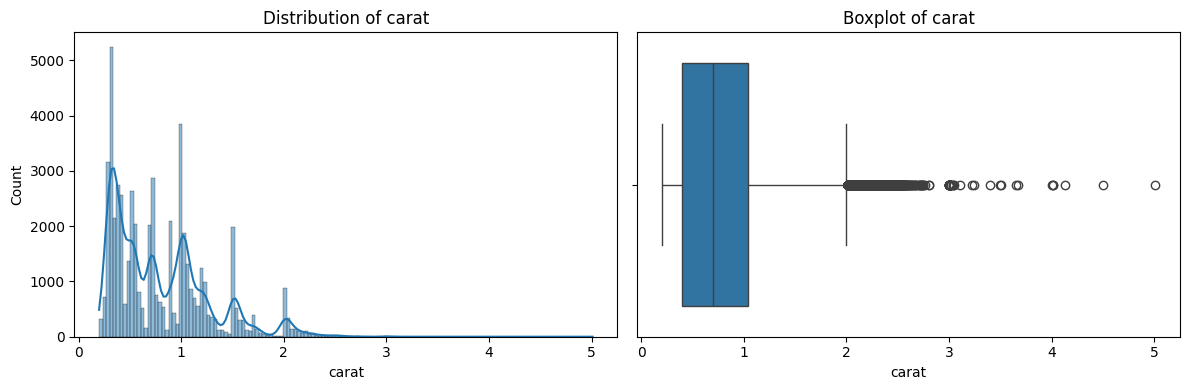

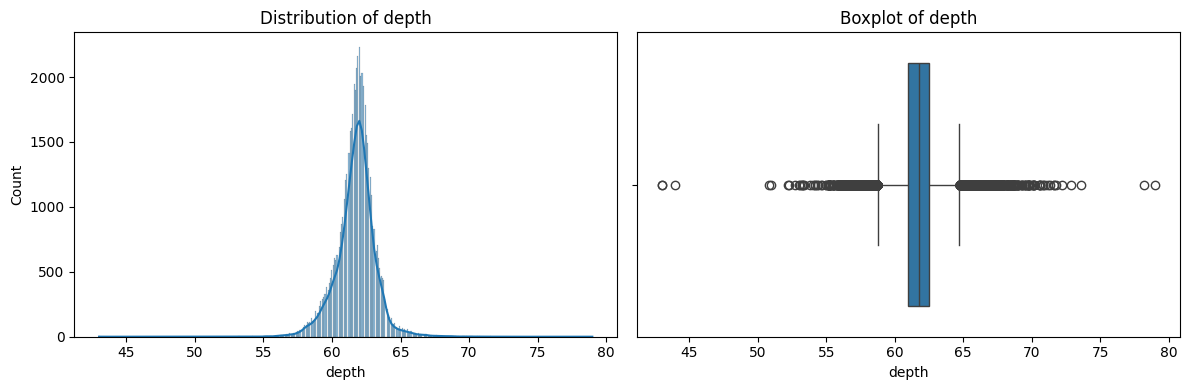

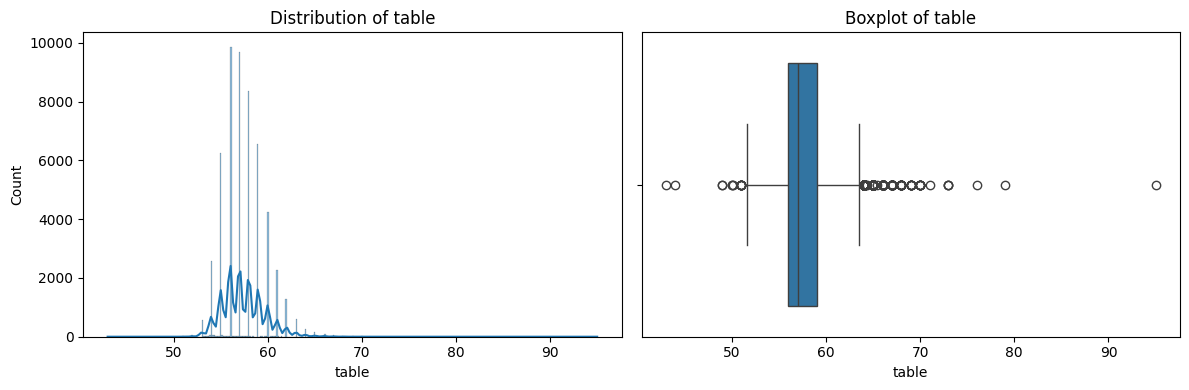

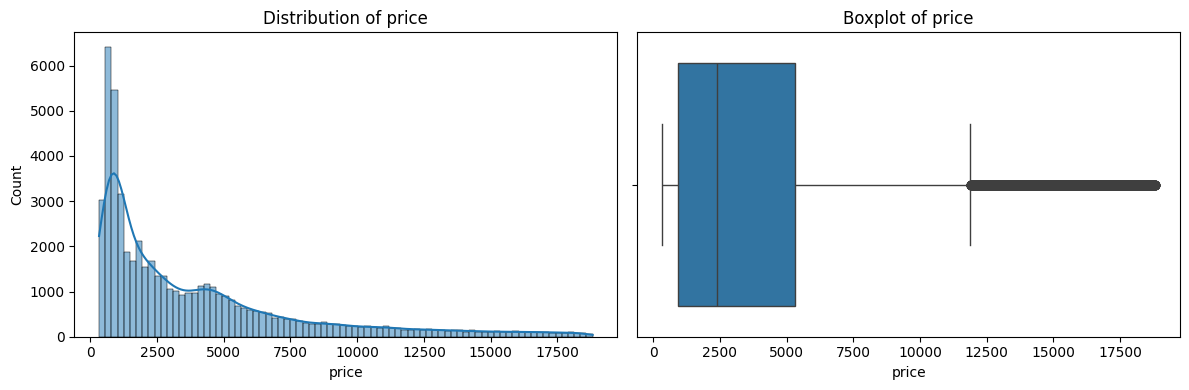

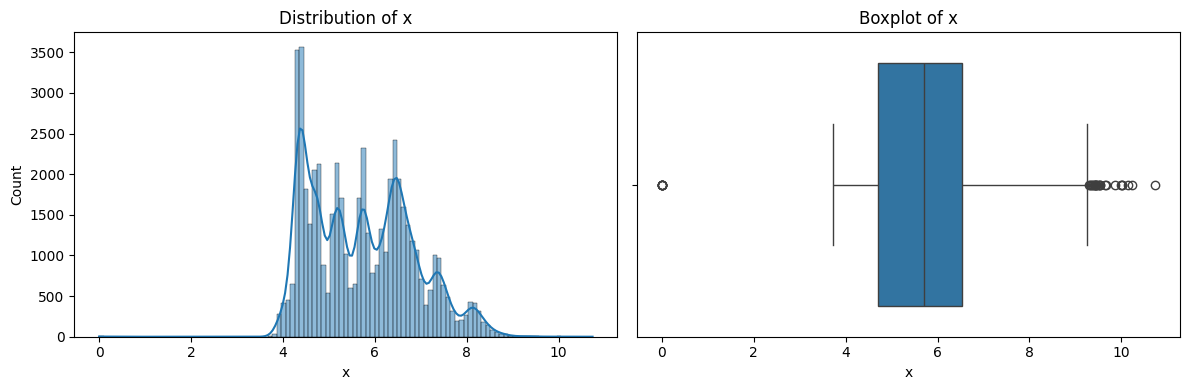

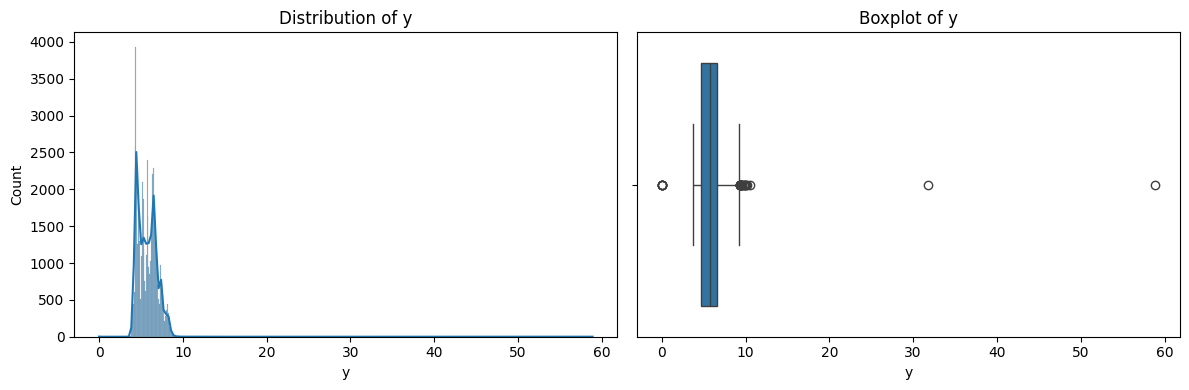

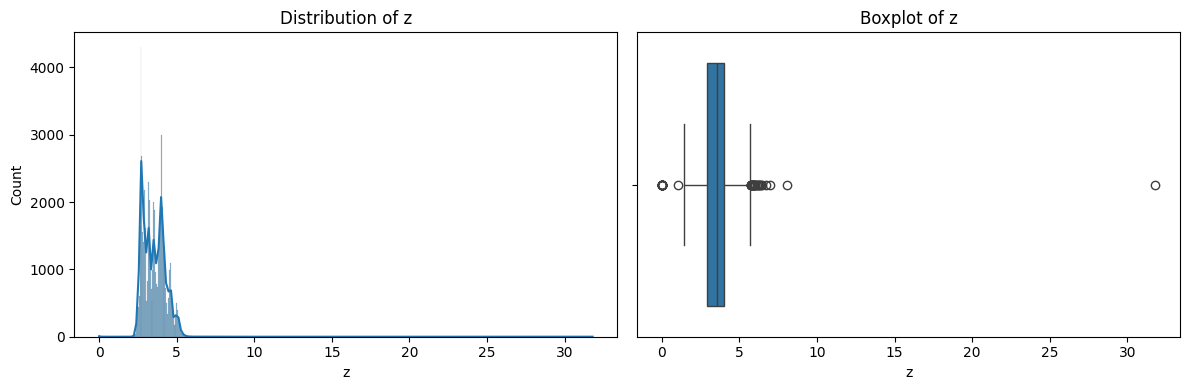

In [37]:
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


In [39]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
df_scaled = df.copy()

# Standard Scaling for 'depth' and 'table' because their distribution is close to normal
standard = StandardScaler()
df_scaled[['depth', 'table']] = standard.fit_transform(df_scaled[['depth', 'table']])

# Robust Scaling for 'x', 'y', 'z' because they contain outliers
robust = RobustScaler()
df_scaled[['x', 'y', 'z']] = robust.fit_transform(df_scaled[['x', 'y', 'z']])

# Log Transformation for 'carat' and 'price' because they are right-skewed (must be > 0)
df_scaled[['carat', 'price']] = np.log1p(df_scaled[['carat', 'price']])



In [40]:
df_scaled.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_E,color_F,color_G,color_H,color_I,color_J
0,0.207014,Ideal,E,SI2,-0.173444,-1.100454,5.789960,-0.956284,-0.950549,-0.982143,2,1,0,0,0,0,0
1,0.190620,Premium,E,SI1,-1.362418,1.585652,5.789960,-0.989071,-1.027473,-1.089286,3,1,0,0,0,0,0
2,0.207014,Good,E,VS1,-3.390669,3.376390,5.793014,-0.901639,-0.901099,-1.089286,1,1,0,0,0,0,0
3,0.254642,Premium,I,VS2,0.456014,0.242599,5.814131,-0.819672,-0.813187,-0.803571,3,0,0,0,0,1,0
4,0.270027,Good,J,SI2,1.085471,0.242599,5.817111,-0.743169,-0.747253,-0.696429,1,0,0,0,0,0,1
